## Ciclos temporais e dados direcionais

### Importando bibliotecas

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Importando conjunto de dados

In [2]:
data = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')
data

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 283817)
Coordinates:
  * latitude                 (latitude) float32 40.25
  * longitude                (longitude) float32 -73.16
  * time                     (time) datetime64[ns] 1975-10-24T12:00:00 ... 20...
Data variables: (12/13)
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    ...                       ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
Attributes:
    institution:  NOAA National Data Buoy Center and Participators in Data As...
    url:          http://dods.ndbc.noaa.gov
    quality:      Automated QC checks with manual editing and comprehensive m...
    conventions:  COARDS
    station:      44025
    comment:      LONG ISLAND - 30 NM South of Islip, NY
    location:     40.251 N 73.164 W

**Selecionando o intervalo de tempo para utilizar**

In [3]:
data = data.sel(time=slice('2019-01-01', '2020-01-01'))
dataset = data.to_dataframe().reset_index().set_index('time')

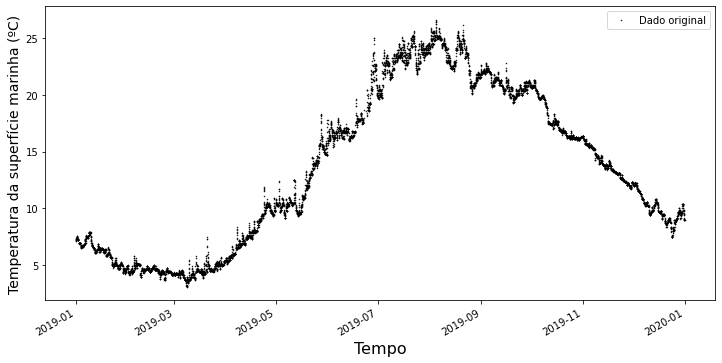

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

dataset['sea_surface_temperature'].plot(ax=ax,label='Dado original', linestyle='None', marker='.', markersize=1, c='black')

plt.ylabel('Temperatura da superfície marinha (ºC)', fontsize=14)
plt.xlabel('Tempo', fontsize=16)
plt.legend()

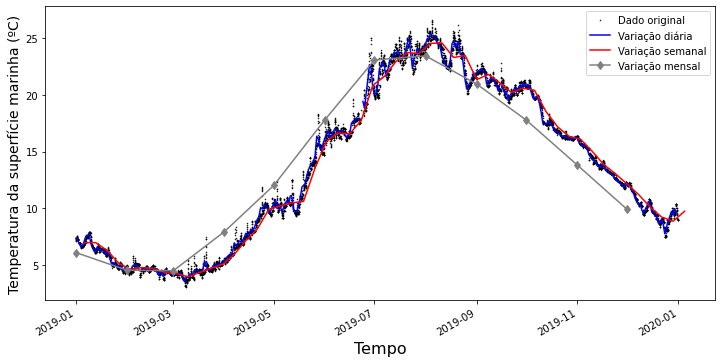

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

dataset['sea_surface_temperature'].plot(ax=ax,label='Dado original', linestyle='None', marker='.', markersize=1, c='black')
dataset['sea_surface_temperature'].resample('D').mean().plot(ax=ax,label='Variação diária', c='blue')
dataset['sea_surface_temperature'].resample('W').mean().plot(ax=ax,label='Variação semanal', c='red')
dataset['sea_surface_temperature'].resample('MS').mean().plot(ax=ax,label='Variação mensal', marker='d', c='gray')

plt.ylabel('Temperatura da superfície marinha (ºC)', fontsize=14)
plt.xlabel('Tempo', fontsize=16)
plt.legend()

<ipython-input-9-b2d56c0acc81>:8: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  dataset['sea_surface_temperature'].resample('MS', loffset=timedelta(days=15)).mean().plot(ax=ax,label='15º dia do mês',


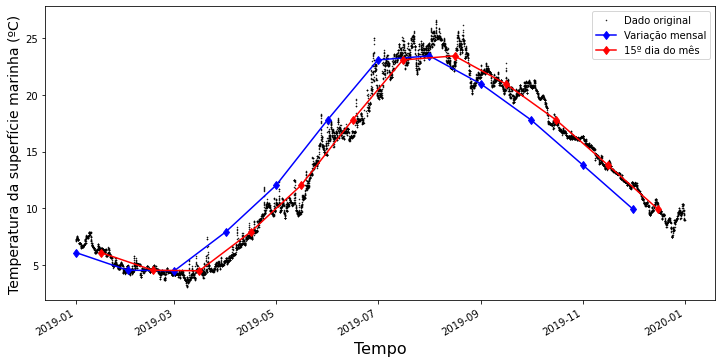

In [9]:
from datetime import timedelta

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

dataset['sea_surface_temperature'].plot(ax=ax,label='Dado original', linestyle='None', marker='.', markersize=1, c='black')
dataset['sea_surface_temperature'].resample('MS').mean().plot(ax=ax,label='Variação mensal', marker='d', c='blue')
dataset['sea_surface_temperature'].resample('MS', loffset=timedelta(days=15)).mean().plot(ax=ax,label='15º dia do mês', 
                                                                                          marker='d', c='red')

plt.ylabel('Temperatura da superfície marinha (ºC)', fontsize=14)
plt.xlabel('Tempo', fontsize=16)
plt.legend()

### Carregando 10 anos de coleta de dados

In [10]:
# Carregando 10 anos de coleta de dados
# Open dataset
ds = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')

# Selecionando o intervalo no tempo
ds = ds.sel(time=slice('2010-01-01','2020-01-01'))

# Convertendo para DataFrame do Pandas
df = ds.to_dataframe().reset_index().set_index('time')

Text(0.5, 0, 'Tempo')

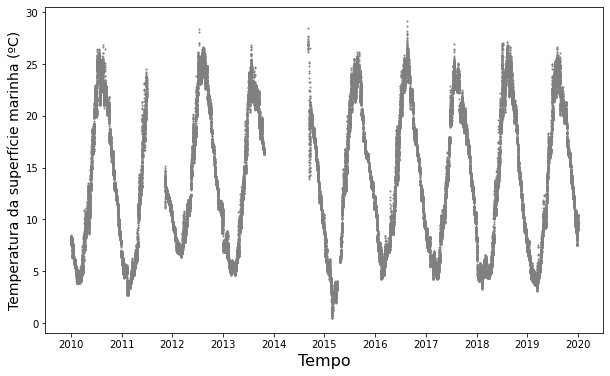

In [11]:
plt.figure(figsize=(10,6))

plt.scatter(df.index, df.sea_surface_temperature, c='gray', s=1)

plt.ylabel('Temperatura da superfície marinha (ºC)', fontsize=14)
plt.xlabel('Tempo', fontsize=16)

Podemos observar este conjunto de dados sob diferentes perspectivas temporais:

* Horas do dia - Existe um ciclo diário?
* Podemos observar se há variação sazonal
* Dias da semana - Não é muito útil
* Dias do mês
* Meses do ano - Existe um padrão anual?
* Dia do ano - Observação com maior resolução das médias mensais

In [12]:
# Adicionar coluna para a hora do dia
df['hour'] = df.index.hour

# E mês
df['month'] = df.index.month

# E dia do ano
df['yearday'] = df.index.dayofyear

In [13]:
hour_mean = df.sea_surface_temperature.groupby(df.hour).mean()

In [14]:
hour_mean

hour
0     13.695648
1     13.663088
2     13.642871
3     13.574492
4     13.571736
5     13.556032
6     13.518185
7     13.512770
8     13.472214
9     13.477077
10    13.451364
11    13.460843
12    13.476684
13    13.526739
14    13.589410
15    13.663535
16    13.737000
17    13.799841
18    13.849412
19    13.878705
20    13.880931
21    13.839417
22    13.760115
23    13.741087
Name: sea_surface_temperature, dtype: float32

Text(0, 0.5, 'Temperatura (ºC)')

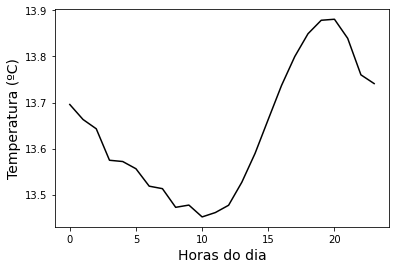

In [15]:
plt.plot(hour_mean.index, hour_mean, c='black')
plt.xlabel('Horas do dia', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)

In [16]:
# Funções para cálculo dos quartis
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.quantile(0.50)

def q3(x):
    return x.quantile(0.75)

In [17]:
hour_mean =  df.sea_surface_temperature.groupby(df.hour).agg([q1, q2, q3, np.mean])

In [18]:
hour_mean.head()

,q1,q2,q3,mean
hour,,,,
0,7.4,13.0,19.900000,13.695648
1,7.4,13.0,19.799999,13.663088
2,7.4,12.9,19.799999,13.642871
3,7.4,12.9,19.799999,13.574492
4,7.4,12.9,19.799999,13.571736


**Quartis da variação horária**

Note que este gráfico não é tão informativo ...

Text(0, 0.5, 'Temperatura (ºC)')

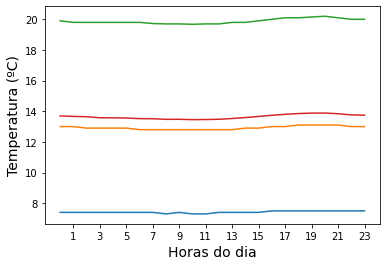

In [19]:
plt.plot(hour_mean.index, hour_mean.q1)
plt.plot(hour_mean.index, hour_mean.q2)
plt.plot(hour_mean.index, hour_mean.q3)
plt.plot(hour_mean.index, hour_mean['mean'])

plt.xticks(np.arange(1,24,2))
plt.xlabel('Horas do dia', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)

No entanto, para períodos de tempo cada vez maiores ...

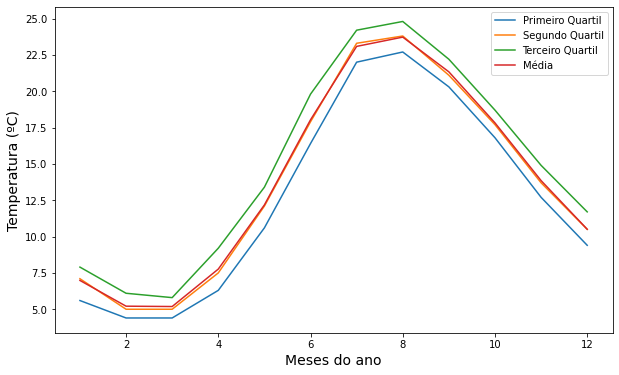

In [20]:
plt.figure(figsize=(10,6))
# Calculate the average
month_mean = df.sea_surface_temperature.groupby(df.month).agg([q1, q2, q3, np.mean])

# Quick Plot
plt.plot(month_mean.index, month_mean.q1, label='Primeiro Quartil')
plt.plot(month_mean.index, month_mean.q2, label='Segundo Quartil')
plt.plot(month_mean.index, month_mean.q3, label='Terceiro Quartil')
plt.plot(month_mean.index, month_mean['mean'], label='Média')

plt.xlabel('Meses do ano', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.legend()

In [21]:
normal_climatology = df.groupby(df.index.month).mean()
normal_climatology

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level,hour,month,yearday
time,,,,,,,,,,,,,,,,
1,40.250999,-73.164001,227.675220,8.371599,10.385938,1.499277,195.126355,1017.010071,2.899611,6.982348,-2.487602,NaN,NaN,11.490255,1,16.035532
2,40.250999,-73.164001,222.490004,8.024861,9.798648,1.473149,183.770847,1016.210510,3.516074,5.211267,-1.869530,NaN,NaN,11.512842,2,45.627593
3,40.250999,-73.164001,201.836573,7.574954,9.183776,1.457474,164.837581,1016.639893,4.993104,5.187761,1.684024,NaN,NaN,11.507434,3,75.218952
4,40.250999,-73.164001,192.415190,6.253114,7.505553,1.341027,156.084502,1015.159424,8.593872,7.763681,5.472376,NaN,NaN,11.506242,4,106.077598
5,40.250999,-73.164001,173.683474,5.379606,6.379094,1.138626,149.810407,1016.031677,13.113023,12.178101,11.714257,NaN,NaN,11.492474,5,136.166616
6,40.250999,-73.164001,188.223616,5.222440,6.203795,0.990192,154.321872,1013.318787,18.731003,18.034389,16.534309,NaN,NaN,11.488631,6,166.646542
7,40.250999,-73.164001,192.705622,4.964872,5.911243,0.937967,157.869180,1014.778870,23.350443,23.085400,20.713778,NaN,NaN,11.473254,7,197.122998
8,40.250999,-73.164001,187.551736,5.224868,6.250377,0.953593,149.328885,1015.773560,23.589617,23.723413,19.803507,NaN,NaN,11.513504,8,228.691512
9,40.250999,-73.164001,167.166559,6.106710,7.435549,1.274251,138.031492,1017.589844,20.553637,21.334000,15.588165,NaN,NaN,11.522691,9,259.099292


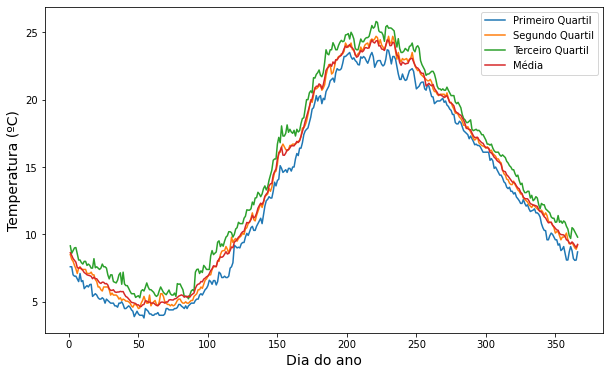

In [22]:
plt.figure(figsize=(10,6))
# Calculate the average
yearday_mean = df.sea_surface_temperature.groupby(df.yearday).agg([q1, q2, q3, np.mean])

# Quick Plot
plt.plot(yearday_mean.index, yearday_mean.q1, label='Primeiro Quartil')
plt.plot(yearday_mean.index, yearday_mean.q2, label='Segundo Quartil')
plt.plot(yearday_mean.index, yearday_mean.q3, label='Terceiro Quartil')
plt.plot(yearday_mean.index, yearday_mean['mean'], label='Média')

plt.xlabel('Dia do ano', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.legend()

Text(0.5, 1.0, 'Ciclo Sazonal da Temperatura da Superfície Marinha na Estação NDBC 44025 de 2010-2019')

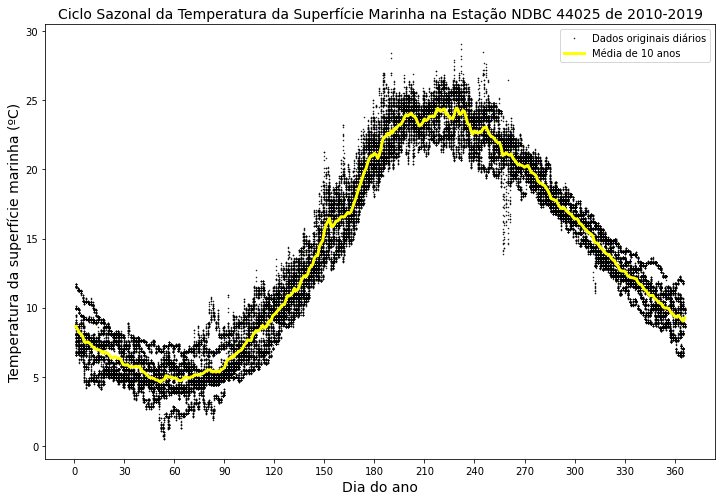

In [24]:
# Pretty plot of data by Yearday
plt.figure(figsize=(12,8))
plt.plot(df.yearday,df.sea_surface_temperature,'.',markersize=1,label='Dados originais diários', c='black')
plt.plot(yearday_mean.index,yearday_mean['mean'], linewidth=3, label='Média de 10 anos', c='yellow')

plt.legend()
plt.xlabel('Dia do ano', fontsize=14)
plt.ylabel('Temperatura da superfície marinha (ºC)', fontsize=14)
plt.xticks(np.arange(0,365,30))
plt.title('Ciclo Sazonal da Temperatura da Superfície Marinha na Estação NDBC 44025 de 2010-2019', fontsize=14)

In [25]:
len(df.index)

75609

In [26]:
len(df['sea_surface_temperature'].resample('MS').mean())

120

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(df['sea_surface_temperature'].resample('MS').mean(), c='gray',lw=2)

plt.ylabel('Temperatura da superfície marinha (ºC)', fontsize=14)
plt.xlabel('Tempo', fontsize=16)

In [ ]:
a = df.groupby([df.index.year,df.index.month]).mean()
a

In [ ]:
a.sea_surface_temperature.unstack(0)

In [ ]:
# A crude plot
fig.set_size_inches(12, 6)
a.sea_surface_temperature.unstack(0).plot(cmap='Spectral')
plt.xlabel('Mês do ano', fontsize=14)
plt.ylabel('Temperatura média (ºC)', fontsize=14)
plt.xticks(np.arange(1,13,1))
plt.title('Média Mensal da Tempertura da Superfície Marinha na Estação 44025', fontsize=14)
plt.legend()

### Dados direcionais e rosa dos ventos

In [28]:
from windrose import WindroseAxes

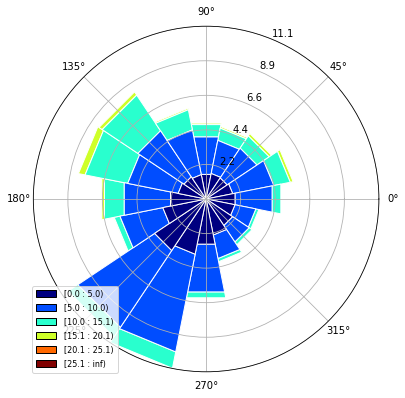

In [29]:
fig = plt.figure(figsize=(6,6))

# Plot the windrose
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df.wind_dir, df.wind_spd, normed=True, opening=1, edgecolor='white')
ax.set_legend()

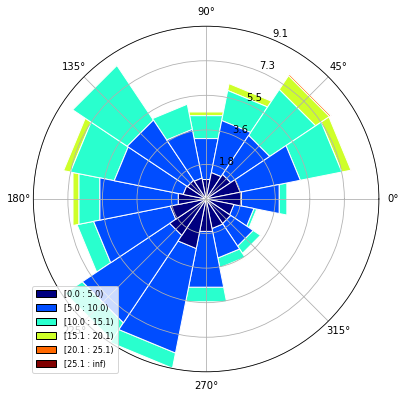

In [32]:
# Define a month to plot
month = 10

fig = plt.figure(figsize=(6,6))

# Plot the windrose
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df.wind_dir[df.index.month==month], df.wind_spd[df.index.month==month], normed=True, opening=1, edgecolor='white')
ax.set_legend()